<a href="https://colab.research.google.com/github/xai-bio/pancoronavirus-antivirals/blob/main/COVID_19_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection & Preprocessing: QSAR Modelling of Chemical Compounds to Discover Potential SARS-CoV-2 Therapeutics by Predicting their Biological Activity**

Quantitative Structure-Activity Relationships (QSAR) modelling methods - mathematical, statistical and computational - reveal the structural properties of chemical compounds to impact biological activity and predict their effect. Structural properties are defined by physicochemical properties, e.g. solubility, molecular shape and size. 

**Publications**
* [Large scale comparison of QSAR and conformal prediction methods and their applications in drug discovery](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0325-4)
* [canSAR chemistry registration and standardization pipeline](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9148294/#!po=5.17241)

# **1. Data Collection of Bioactivity Data**
## **ChEMBL Database**

ChEMBL is a [database](https://www.ebi.ac.uk/chembl/) of manually extracted and curated Structure-Activity Relationship data from the medicinal chemistry literature, bringing together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs. ChEMBL provides 2D structures of bioactive molecules with drug-like properties, capturing the association between a ligand and a biological target in the form of an experimentally measured activity end-point, e.g. half-maximal inhibitory concentration (**IC50**). Other calculated properties are provided, such as logP, Molecular Weight, Lipinski Parameters, etc. Also, abstracted bioactivities, e.g. binding constants, pharmacology and ADMET data. The database as of 22 February 2022 contains: 

* 2,786,911 compound records
* 2,157,379 compounds (of which 2,136,187 have mol files)
* 19,286,751 activities
* 1,458,215 assays
* 14,855 targets
* 84,092 documents.   

## **ChEMBL API**

[ChEMBL on GitHub](https://github.com/chembl) provides the official Python client library for the ChEMBL webresource client. The library helps access ChEMBL data and cheminformatics tools using Python. Resources on how to use the client library are in the GitHub repository.

Molecule records may be [retrieved in several ways](https://hub.gke2.mybinder.org/user/chembl-chembl_webresource_client-rcnuez6z/notebooks/demo_wrc.ipynb), such as lookup of single molecules using various identifiers or searching for compounds via similarity. Also, run other queries, e.g. approved drugs by disease, year or name, etc. 

**Resources:** 
* [ChEMBL Data Questions](https://chembl.gitbook.io/chembl-interface-documentation/frequently-asked-questions/chembl-data-questions)
* [ChEMBL webresource client GitHub repository](https://github.com/chembl/chembl_webresource_client)
* [ChEMBL Live Jupyter notebook with examples](http://beta.mybinder.org/v2/gh/chembl/chembl_webresource_client/master?filepath=demo_wrc.ipynb)
* [ChEMBL web services API live documentation Explorer](https://www.ebi.ac.uk/chembl/api/data/docs)

**Publications:** 
* [myChEMBL: a virtual machine implementation of open data and cheminformatics tools](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3892694/)
* [ChEMBL web services: streamlining access to drug discovery data and utilities](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4489243/#__ffn_sectitle)
* [Activity, assay and target data curation and quality in the ChEMBL database](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4607714/)
*  [ChEMBL Beaker: A Lightweight Web Framework Providing Robust and Extensible Cheminformatics Services](https://www.mdpi.com/2078-1547/5/2/444/htm) 
* [Want Drugs? Use Python](https://arxiv.org/abs/1607.00378)


In [ ]:
# Install ChEMBL library
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# In order to use ChEMBL settings you need to import them before using the client
from chembl_webresource_client.settings import Settings

In [ ]:
# List all available data entities in the ChEMBL database
from chembl_webresource_client.new_client import new_client
available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print (available_resources)

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_class', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from chembl_webresource_client.new_client import new_client

In [ ]:
# Search for SARS-CoV-2 target protein
# Assign variables and create targets dataframe
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [ ]:
# Assign SARS-CoV-2 to the variable selected target 
selected_target = targets.target_chembl_id[7]
selected_target

'CHEMBL4523582'

In [ ]:
# Explore variables
targets.columns

Index(['cross_references', 'organism', 'pref_name', 'score',
       'species_group_flag', 'target_chembl_id', 'target_components',
       'target_type', 'tax_id'],
      dtype='object')

In [ ]:
#Explore biological activity standard types for SARS-CoV-2
bioactivity = new_client.activity
res = bioactivity.filter(target_chembl_id = selected_target)

In [ ]:
dfbioactivity = pd.DataFrame.from_dict(res)

In [ ]:
dfbioactivity

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,19955497,[],CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,None,None,BAO_0000201,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,Inhibition,%,UO_0000187,None,29.96
1,None,19955498,[],CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,None,None,BAO_0000201,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,Inhibition,%,UO_0000187,None,21.72
2,None,19955499,[],CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,None,None,BAO_0000201,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,Inhibition,%,UO_0000187,None,24.9
3,None,19955500,[],CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,None,None,BAO_0000201,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,Inhibition,%,UO_0000187,None,38.63
4,None,19955501,[],CHEMBL4495582,SARS-CoV-2 3CL-Pro protease inhibition percent...,F,None,None,BAO_0000201,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,Inhibition,%,UO_0000187,None,22.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8814,Dtt Insensitive,19964311,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,1.24
8815,Dtt Insensitive,19964312,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,4.98
8816,Dtt Insensitive,19964313,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.75
8817,Dtt Insensitive,19964314,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.88


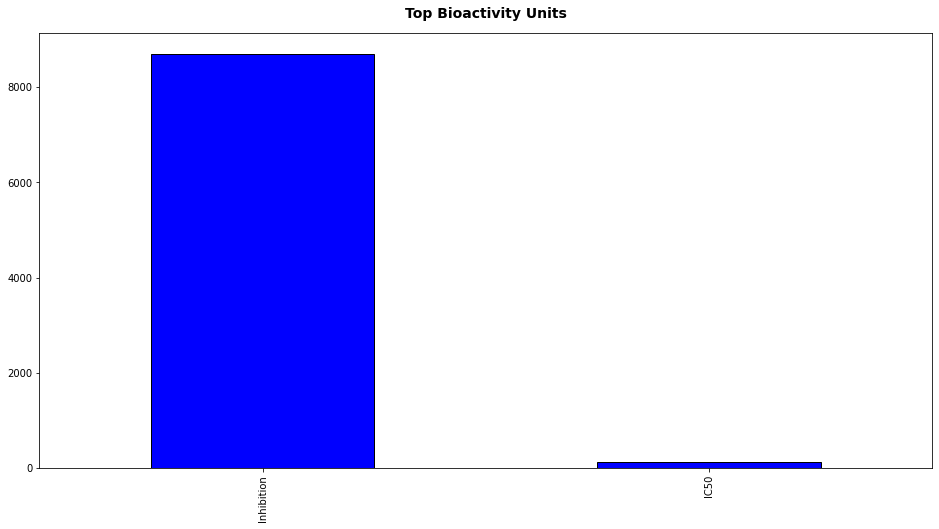

In [ ]:
dfbioactivity.standard_type.value_counts()[:10].plot.bar(figsize=(16,8), color='#0000FF', ec='black')
plt.title('Top Bioactivity Units', fontsize=14, fontweight='black', pad=15)
plt.show()

In [ ]:
dfbioactivity ['standard_type'].value_counts()

Inhibition    8702
IC50           117
Name: standard_type, dtype: int64

In [ ]:
# Explore assays
assay = ['assay_description', 'standard_type', 'standard_units', 'standard_value']
dfassay = dfbioactivity [assay]
dfassay

,assay_description,standard_type,standard_units,standard_value
0,SARS-CoV-2 3CL-Pro protease inhibition percent...,Inhibition,%,29.96
1,SARS-CoV-2 3CL-Pro protease inhibition percent...,Inhibition,%,21.72
2,SARS-CoV-2 3CL-Pro protease inhibition percent...,Inhibition,%,24.9
3,SARS-CoV-2 3CL-Pro protease inhibition percent...,Inhibition,%,38.63
4,SARS-CoV-2 3CL-Pro protease inhibition percent...,Inhibition,%,22.96
...,...,...,...,...
8814,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,IC50,nM,1240.0
8815,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,IC50,nM,4980.0
8816,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,IC50,nM,750.0
8817,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,IC50,nM,880.0


# **Biological Activity**

[Biological activity](https://www.sciencedirect.com/science/article/pii/B9780128241356000131) is “the capacity of a specific molecular entity to achieve a defined biological effect” on a target (Jackson et al., 2007), and it is measured by the activity or concentration of a molecule required to cause that activity, and biological activity is always measured by biological assay. Biological activity is always depend on the dose that given to the living organism, so it is logically to show either beneficial or adverse effect that range from low to high. Activity depends mainly on the action of the “absorption, distribution, metabolism, and excretion,” (ADME) measurement. To be an active medicine, a compound not only must be active against a target, but also possess the exact ADME characteristics that let it be utilized as a drug (Jagan et al., 2012). 

Biological activity occurs as a result of certain effects from exposure to a molecule. These influences a metabolic or physiological response. The evaluation of biological activity requires test systems, which are in the body of the organism, and acquire signals, mainly spectrophotometry, or photometry, in parallel experiments of different concentrations of test samples and comparison with control samples. In such tests, computational systems are needed to process, store, sort and visualize data using appropriate mathematical or statistical models to interpret and evaluate results and link sets of data and signals from various origins (Wolfram & Trifan, 2018). 

There are many types of biological activities e.g. antimicrobial, antifungal, antioxidant, antitumor, anticancer, antimalarial, anti-tuberculosis, anti-inflammatory, anti-aging, anti-proliferative, hypoglycemic, hypocholesterolemic, antihypertensive activities [(Mariod et al. 2022)](https://www.sciencedirect.com/science/article/pii/B9780128241356000131).

Absorption, distribution, metabolism, and excretion (**ADME**) - pharmacokinetic properties - are the main action used to measure biological activity. In other words, bioactivity describes the beneficial or adverse effects of a drug on living matter. [Most used activity types](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/inhibitory-concentration-50):

* **IC50:** Inhibitory Concentration 50%, the molar concentration of an antagonist/inhibitor that reduces the response to an agonist by 50% (ICx – other percentage values can be specified)
* **A2:** the molar concentration of an antagonist that requires double concentration of the agonist to elicit the same submaximal response, obtained in the absence of antagonist
* **EC50:** Effective Concentration 50%, the molar concentration of an agonist/substrate that produces 50% of the maximal possible effect (or reaction velocity) of that agonist (substrate)
* **ED50** Effective Dose 50%, the dose of a drug that produces, on average, a specified all-or-none response in 50% of a test population or, if the response is graded, the dose that produces 50% of the maximal response to that drug
* **Ki, Kd** – inhibition respectively direct binding experiment equilibrium dissociation constants.

## **Half-maximal inhibitory concentration (IC50)** 
IC50 is the most widely used and informative measure of a drug's efficacy. It indicates how much drug is needed to inhibit a biological process by half, thus providing a measure of potency of an antagonist drug in pharmacological research. Most approaches to determine IC50 of a pharmacological compound are based on assays that utilise whole cell systems. While they generally provide outstanding potency information, results can depend on the experimental cell line used and may not differentiate a compound's ability to inhibit specific interactions [(Aykul S and Martinez-Hackert 2016)](https://pubmed.ncbi.nlm.nih.gov/27365221/).

**Resources:**
* [DrugBank Glossary](https://dev.drugbank.com/guides/terms)

**Publications:**
* [Bioactivity descriptors for uncharacterized chemical compounds](https://www.nature.com/articles/s41467-021-24150-4)

In [ ]:
# Explore IC50 bioactivity data for SARS-CoV-2
# Extract SARS-CoV-2 IC50 bioactivity data; filter by activity to obtain IC50 data 
# Create a dataframe of SARS-CoV-2 bioactivity data, 'COVID-19'
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,Dtt Insensitive,19964199,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.39
1,Dtt Insensitive,19964200,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.21
2,Dtt Insensitive,19964201,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.08
3,Dtt Insensitive,19964202,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,1.58
4,Dtt Insensitive,19964203,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Dtt Insensitive,19964311,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,1.24
113,Dtt Insensitive,19964312,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,4.98
114,Dtt Insensitive,19964313,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.75
115,Dtt Insensitive,19964314,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.88


In [ ]:
# Explore variables in dataframe
df.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [ ]:
# Review data working with by checking data structure and data type of the dataframe
df.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
# Save bioactivity data in a CSV file
df.to_csv('chembl_bioactivity_raw_data.csv', index=False)

In [ ]:
# Mount Google Drive into Colab so have access to Google drive from within Colab
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Create COVID-19 data folder in Colab Notebooks folder on Google Drive
! mkdir "/content/gdrive/My Drive/Colab Notebooks/COVID-19 Data"

In [ ]:
# Copy bioactivity data CSV to COVID-19 data folder
! cp chembl_bioactivity_raw_data.csv "/content/gdrive/My Drive/Colab Notebooks/COVID-19 Data"

In [ ]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/COVID-19 Data"

total 57
-rw------- 1 root root 57916 Jun 15 13:52 chembl_bioactivity_raw_data.csv


In [ ]:
! head chembl_bioactivity_raw_data.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
Dtt Insensitive,19964199,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 determined by FRET kind of response from peptide substrate,F,,,BAO_0000190,BAO_0000019,assay format,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,,,CHEMBL4495564,,2020,,CHEMBL480,LANSOPRAZOLE,CHEMBL480,6.41,0,http://www.openphacts.or

# **2. Data Preprocessing of Biological Activity Data**

In [ ]:
# Data cleaning, editing, reduction, wrangling 
# Remove missing values from compounds for standard_value and canonical_smiles variables
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,Dtt Insensitive,19964199,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.39
1,Dtt Insensitive,19964200,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.21
2,Dtt Insensitive,19964201,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.08
3,Dtt Insensitive,19964202,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,1.58
4,Dtt Insensitive,19964203,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Dtt Insensitive,19964310,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,4.36
112,Dtt Insensitive,19964311,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,1.24
113,Dtt Insensitive,19964312,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,4.98
114,Dtt Insensitive,19964313,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.75


In [ ]:
# Explore number of unique rows in the list to identify duplicate data
len(df2.canonical_smiles.unique())

102

In [ ]:
# Remove duplicate data and create a new dataframe
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,Dtt Insensitive,19964199,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.39
1,Dtt Insensitive,19964200,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.21
2,Dtt Insensitive,19964201,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.08
3,Dtt Insensitive,19964202,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,1.58
4,Dtt Insensitive,19964203,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Dtt Insensitive,19964310,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,4.36
112,Dtt Insensitive,19964311,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,1.24
113,Dtt Insensitive,19964312,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,4.98
114,Dtt Insensitive,19964313,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.75


# **Features of Machine Learning Model**

**ChEMBL ID:** each molecule is assigned a unique ChEMBL identifier, which take the form of a ‘CHEMBL’ prefix followed immediately by an integer (e.g., CHEMBL25 is the compound aspirin, CHEMBL210 is the human beta-2 adrenergic receptor "target").

**SMILES:** Simplified Molecular Input Line Entry System is a specification in the form of a line notation for describing the structure of chemical species using short ASCII strings. SMILES strings can be imported by most molecule editors for conversion back into two-dimensional drawings or three-dimensional models of the molecules ([Wikipedia](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system)).

**Standard Value:** represents the potency of the drug. Low values indicate good potency, high values bad potency. In this model we're working with IC50 values, which means that in order to elicit 50% of the inhibitory concentration of a therapeutic target, then you need lower levels of concentration of the compound to affect the target. If the values are high, then it means higher concentrations of the drug are required to produce the same effect - inhibition at 50%, e.g. taking 500mg of a drug versus 10,000mg. 

In [ ]:
# Create a new dataframe consisting of 3 input variables: molecule_chembl_id, canonical_smiles and standard_value
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0
...,...,...,...
111,CHEMBL376488,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,4360.0
112,CHEMBL154580,C=CC(=O)c1ccc2ccccc2c1,1240.0
113,CHEMBL354349,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.[Cl-],4980.0
114,CHEMBL1382627,Nc1ccc(S(=O)(=O)[N-]c2ncccn2)cc1.[Ag+],750.0


In [ ]:
# Save new dataframe to a CSV file
df3.to_csv('chembl_bioactivity_data_clean.csv', index=False)

In [ ]:
# Create a new dataframe and CSV file for the purpose of labelling compounds
df4 = pd.read_csv('chembl_bioactivity_data_clean.csv')

# **Labels for Machine learning Model**

Assign labels to compounds according to their bioactivity class: 

1. **active compounds**: values of less than 1,000 nM; defined as therapeutics that are ic50 
2. **inactive compounds**: values greater than 10,000 nM
3. **intermediate compounds**: values between 1,000 nM and 10,000 nM

In [ ]:
# Label compounds by their potency 
# Iterate molecule_chembl_id, canonical smiles, standard value and assign to a list
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
# Combine iterated lists into a dataframe
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active
...,...,...,...,...
97,CHEMBL376488,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,4360.0,intermediate
98,CHEMBL154580,C=CC(=O)c1ccc2ccccc2c1,1240.0,intermediate
99,CHEMBL354349,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.[Cl-],4980.0,intermediate
100,CHEMBL1382627,Nc1ccc(S(=O)(=O)[N-]c2ncccn2)cc1.[Ag+],750.0,active


In [ ]:
df5.to_csv('chembl_bioactivity_data_ready.csv', index=False)

In [ ]:
# Copy data to COVID-19 data folder
! cp chembl_bioactivity_data_clean.csv "/content/gdrive/My Drive/Colab Notebooks/COVID-19 Data"
! cp chembl_bioactivity_data_ready.csv "/content/gdrive/My Drive/Colab Notebooks/COVID-19 Data"

In [ ]:
! ls "/content/gdrive/My Drive/Colab Notebooks/COVID-19 Data"

chembl_bioactivity_data_clean.csv  chembl_bioactivity_raw_data.csv
chembl_bioactivity_data_ready.csv
